# Handwritten Digit Recognition with Support Vector Machines (SVM)

In this project, we will develop a Machine Learning model that classifies handwritten digits using the **Digits** dataset found in the `scikit-learn` library.

This work includes the following steps:
1. Loading and visualizing the dataset.
2. Separating the data into training and test sets.
3. Training the **Support Vector Classifier (SVC)** model.
4. Measuring the model's performance.

In [5]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns # For the heat map

## 1. Loading and Visualizing the Dataset

The Digits dataset contains 8x8 pixel grayscale images of the digits from 0 to 9. Each image consists of 64 features (pixels).

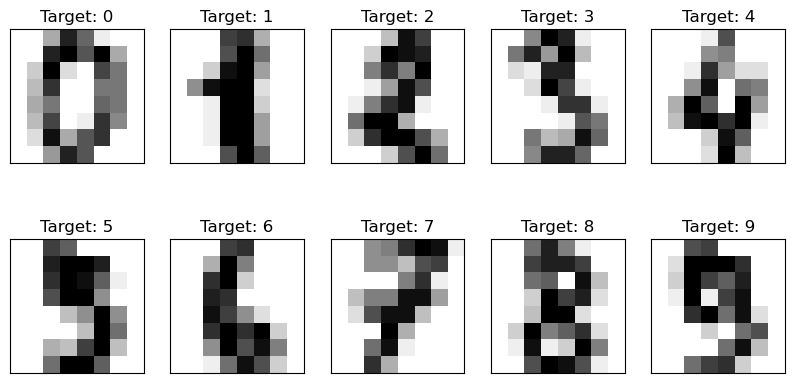

In [6]:
digits = load_digits()

# Let's visualize the first 10 images.
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 5),
                         subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.set_title(f"Target: {digits.target[i]}")

plt.show()

## 2. Data Preparation and Model Training

To train the model, we need to convert the 2D image matrices (8x8) into flattened vectors (of length 64) that our machine learning algorithm can understand. Scikit-learn's `digits.data` feature already provides this flattened format.

We divide the data into 80% training and 20% testing.

In [7]:
# Features (X) and Objectives (Y)
X = digits.data
y = digits.target

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model definition (Linear Kernel usage)
svm_clf = SVC(kernel="linear", random_state=42)

# Model training
svm_clf.fit(X_train, y_train)

# Making a prediction
y_pred = svm_clf.predict(X_test)

## 3. Model Performance and Evaluation

We will use the `classification_report` to measure the model's success and the `confusion_matrix` to see where it made mistakes.

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       0.97      0.94      0.96        34
           4       0.98      0.98      0.98        46
           5       0.96      1.00      0.98        47
           6       1.00      1.00      1.00        35
           7       0.97      0.97      0.97        34
           8       1.00      0.97      0.98        30
           9       0.95      0.93      0.94        40

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



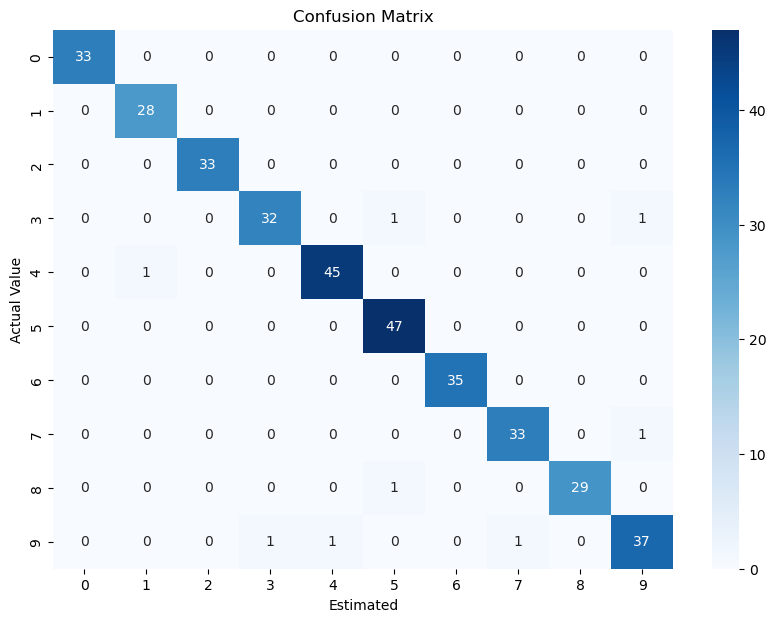

In [8]:
# Print the classification report.
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# Visualizing the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Estimated')
plt.ylabel('Actual Value')
plt.title('Confusion Matrix')
plt.show()